<a href="https://colab.research.google.com/github/PozzOver13/learning/blob/main/stats_and_probability/20240221_pagerank_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reference
https://it.wikipedia.org/wiki/PageRank PageRank Wikipedia  
https://www.youtube.com/watch?v=urKLHNhUEQ0 M4ML - Linear Algebra - 5.7 Introduction to PageRank  



# Basics of PageRank

PageRank is an algorithm used by search engines to rank web pages in their search results. The basic idea is to assign each page a score based on its importance, which is determined by the number and quality of other pages linking to it. The algorithm assumes that more important pages are likely to receive more links from other pages.

The algorithm can be understood through the concept of a Markov chain. Each page represents a state, and the links between pages represent transitions between states. The PageRank of a page is the probability of being on that page after a long random walk on the web.




# Linear Algebra and Markov Chains

PageRank can be expressed using linear algebra. Let \( P \) be the transition probability matrix, where \( P_{ij} \) represents the probability of transitioning from page \( i \) to page \( j \). The PageRank vector \( \mathbf{v} \) can be found by solving the equation \( \mathbf{v}^T = \mathbf{v}^T \cdot P \), where \( \mathbf{v}^T \) is the transpose of the PageRank vector.

# Python Implementation

Here's a simple Python script that demonstrates a basic version of the PageRank algorithm.

In this example, the `links` list represents the links between pages. The PageRank function calculates the PageRank vector using the power iteration method. The damping factor is a parameter that introduces a probability of jumping to any page at random, which helps prevent dead ends in the graph.

Feel free to adapt this script based on your specific use case or data structure. I hope this helps you understand the basics of the PageRank algorithm and its implementation in Python!

## Deep down into PageRank

In [27]:
import numpy as np

In [28]:
# Each element in the links list represents the pages that the corresponding page links to.
links = [[1, 2], [0, 2], [0, 1]]

links

[[1, 2], [0, 2], [0, 1]]

In [29]:
# 3 pages [0,1,2]
num_pages = len(links)

num_pages

3

In [30]:
# Initialize transition probability matrix
P = np.zeros((num_pages, num_pages))

P

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [31]:
# looping over the links
for i, page_links in enumerate(links):
  print(i, page_links)

0 [1, 2]
1 [0, 2]
2 [0, 1]


In [32]:
# deep down into single loop
i, page_links = 0, links[0]

print(i)
print(page_links)

0
[1, 2]


In [33]:
# single row in transition matrix
P[0]

array([0., 0., 0.])

In [34]:
# handle pages with no outgoing links by making all transitions equally probable
np.ones(num_pages) / num_pages

array([0.33333333, 0.33333333, 0.33333333])

In [35]:
# how probability are assigned into the transition matrix
print("link between pages:")
print(page_links)
print("j as list of pages:")
print([j for j in range(num_pages)])
print("extract pages involved in the link:")
print([j for j in range(num_pages) if j in page_links])
print("probability of landing into a specific page starting from the first page:")
print([1/len(page_links) if j in page_links else 0 for j in range(num_pages)])

link between pages:
[1, 2]
j as list of pages:
[0, 1, 2]
extract pages involved in the link:
[1, 2]
probability of landing into a specific page starting from the first page:
[0, 0.5, 0.5]


In [36]:
# update transition probability matrix
P = np.zeros((num_pages, num_pages))
for i, page_links in enumerate(links):
    if len(page_links) == 0:
        # Handle pages with no outgoing links by making all transitions equally probable
        P[i] = np.ones(num_pages) / num_pages
    else:
        P[i] = np.array([1/len(page_links) if j in page_links else 0 for j in range(num_pages)])

In [37]:
P

array([[0. , 0.5, 0.5],
       [0.5, 0. , 0.5],
       [0.5, 0.5, 0. ]])

In [38]:
# Initialize PageRank vector
v = np.ones(num_pages) / num_pages
v

array([0.33333333, 0.33333333, 0.33333333])

In [39]:
# Power iteration to find PageRank
num_iterations = 100
damping_factor = 0.85
# The damping factor is a parameter that introduces a probability of jumping to any page at random, which helps prevent dead ends in the graph.
for _ in range(num_iterations):
    v = damping_factor * np.dot(v, P) + (1 - damping_factor) / num_pages

In [40]:
print()
print(P)
print(v)
print(np.dot(v, P))
print((1 - damping_factor) / num_pages)


[[0.  0.5 0.5]
 [0.5 0.  0.5]
 [0.5 0.5 0. ]]
[0.33333333 0.33333333 0.33333333]
[0.33333333 0.33333333 0.33333333]
0.05000000000000001


In [41]:
v

array([0.33333333, 0.33333333, 0.33333333])

## Application

In [42]:
# function pagerank
def pagerank(links, damping_factor=0.85, num_iterations=100):
    num_pages = len(links)
    # Initialize transition probability matrix
    P = np.zeros((num_pages, num_pages))
    for i, page_links in enumerate(links):
        if len(page_links) == 0:
            # Handle pages with no outgoing links by making all transitions equally probable
            P[i] = np.ones(num_pages) / num_pages
        else:
            P[i] = np.array([1/len(page_links) if j in page_links else 0 for j in range(num_pages)])

    # Initialize PageRank vector
    v = np.ones(num_pages) / num_pages

    # Power iteration to find PageRank
    for _ in range(num_iterations):
        v = damping_factor * np.dot(v, P) + (1 - damping_factor) / num_pages

    return v



In [43]:
# Example usage
# Each element in the links list represents the pages that the corresponding page links to.
links = [
    [1, 2, 3],
    [0, 2, 4],
    [0, 1, 4],
    [0, 4],
    [3]
]
result = pagerank(links)
print("PageRank:", result)

PageRank: [0.22585934 0.13115369 0.13115369 0.28597392 0.22585934]


In [44]:
# !pip install networkx

In [45]:
# plot function using networkx

import networkx as nx
import matplotlib.pyplot as plt

print(nx.__version__)

def plot_network(links):
    G = nx.DiGraph()

    for i, page_links in enumerate(links):
        for link in page_links:
            G.add_edge(i, link)

    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=8, font_color="black", font_weight="bold", arrowsize=10)
    plt.title("PageRank Network")
    plt.show()

3.2.1


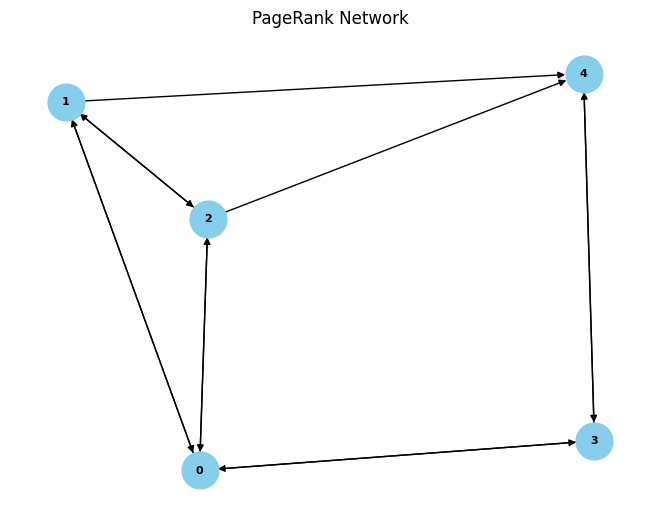

In [46]:
# Plot the network
plot_network(links)

In [47]:
def plot_pagerank_bar(result):
    num_pages = len(result)
    page_indices = np.arange(num_pages)
    sorted_indices = np.argsort(result)[::-1]  # Sort in descending order

    plt.bar(page_indices, result[sorted_indices], color='skyblue')
    plt.xticks(page_indices, sorted_indices)
    plt.xlabel('Page Index')
    plt.ylabel('PageRank Score')
    plt.title('PageRank Scores')
    plt.show()

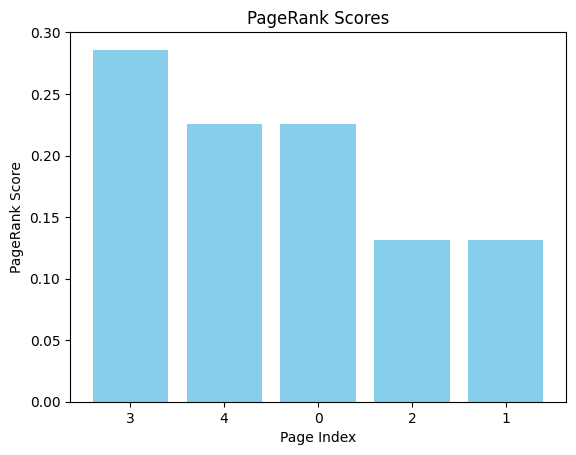

In [48]:
# Plot the PageRank scores as a bar plot
plot_pagerank_bar(result)